<a href="https://colab.research.google.com/github/victorluis22/metodos-numericos-otimizacao/blob/main/simplexNelderMeadipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
import numpy as np
import matplotlib.pyplot as plt

ALLOWED_NAMES = {
    k: v for k, v in np.__dict__.items() if not k.startswith("__")
}

def restriction1(n):
  """Restrição de n >= 0"""
  penalty = 10e6
  # n >= 1 => n - 1 >= 0 => -n + 1 <= 0
  function = "-n + 1.0"

  return penalty * (max([0, eval(function, {"__builtins__": {}, "n": n}, ALLOWED_NAMES)])**2)

def restriction2(r):
  """Restrição de v <= vc"""
  vc = 20.0
  penalty = 10e6
  g, m, kc, t = 9.8, 100.0, 10.5, 250.0

  function = "((g*m) / (kc * 2.0 * pi * (r**2.0))) * (1.0 - e**-(((kc * 2.0 * pi * (r**2.0)) / m) * t)) - vc"

  return penalty * (max([0, eval(function, {"__builtins__": {}, "r": r, "vc": vc, "g": g, "m": m, "kc": kc, "t": t}, ALLOWED_NAMES)])**2)

def f(function, constants, x):
  [x1, x2] = x
  [c0, c1, c2] = constants

  result = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2, "c0": c0, "c1": c1, "c2": c2}, ALLOWED_NAMES) + restriction1(x1) + restriction2(x2)
  # result = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2, "c0": c0, "c1": c1, "c2": c2}, ALLOWED_NAMES)

  return result


In [107]:
def plot3D(function, constants, min, range=5):
    [c0, c1, c2] = constants
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.set_title(f'f(x) = {function}', fontsize=10)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2, "c0": c0, "c1": c1, "c2": c2}, ALLOWED_NAMES)

    ax.plot_surface(x1, x2, z, rstride=1, cstride=1, cmap='viridis', label=f'f(x) = {function}')
    
    ax.scatter(min[0], min[1], eval(function, {"__builtins__": {}, "x1": min[0], "x2": min[1], "c0": c0, "c1": c1, "c2": c2}, ALLOWED_NAMES), color='red', label=f'Mínimo')

def plotContour(function, constants, minimun, triangles, range=5):
    [c0, c1, c2] = constants
    fig = plt.figure()
    ax = fig.add_subplot()

    ax.set_title(f'f(x) = {function}', fontsize=10)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    x1 = np.arange(-range, range, 0.15)
    x2 = np.arange(-range, range, 0.15)
    x1, x2 = np.meshgrid(x1, x2)
    z = eval(function, {"__builtins__": {}, "x1": x1, "x2": x2, "c0": c0, "c1": c1, "c2": c2}, ALLOWED_NAMES)

    # Contorno da função
    ax.contour(x1, x2, z, colors='blue')

    # Triângulos formados
    for triangle in triangles:
        x, y = [], []
        for point in triangle:
            ax.scatter(point[0], point[1], color='green', label=f'Mínimo')
            x.append(point[0])
            y.append(point[1])
            ax.fill(x, y, facecolor='none', edgecolor='purple')

    # Ponto de mínimo encontrado
    ax.scatter(minimun[0], minimun[1], color='red', label=f'Mínimo')

    plt.show()


Iteração 0==========================
Pontos: [[1. 3.]
 [3. 6.]
 [6. 3.]]
f(x) dos vertices: [61.79130845173556, 707.0398572981111, 370.74785071041333]
Melhor vertice: vertices[0] = 61.79130845173556
Vertice Neutro: vertices[2] = 370.74785071041333
Pior vertice: vertices[1] = 707.0398572981111
Centroid: [0. 0.]
Centroid: [1. 3.]
Centroid: [3.5 3. ]
Expansão

Iteração 1==========================
Pontos: [[1. 3.]
 [4. 0.]
 [6. 3.]]
f(x) dos vertices: [61.79130845173556, 4.0, 370.74785071041333]
Melhor vertice: vertices[1] = 4.0
Vertice Neutro: vertices[0] = 61.79130845173556
Pior vertice: vertices[2] = 370.74785071041333
Centroid: [0. 0.]
Centroid: [1. 3.]
Centroid: [2.5 1.5]
Contração Interna
[4.25 2.25]
152.96007606497852

Iteração 2==========================
Pontos: [[1.   3.  ]
 [4.   0.  ]
 [4.25 2.25]]
f(x) dos vertices: [61.79130845173556, 4.0, 152.96007606497852]
Melhor vertice: vertices[1] = 4.0
Vertice Neutro: vertices[0] = 61.79130845173556
Pior vertice: vertices[2] = 152.9600

<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in s


Iteração 47==========================
Pontos: [[2.8125 0.5625]
 [4.     0.    ]
 [1.625  1.125 ]]
f(x) dos vertices: [7261641689.352946, 4.0, 17.132613325861957]
Melhor vertice: vertices[1] = 4.0
Vertice Neutro: vertices[2] = 17.132613325861957
Pior vertice: vertices[0] = 7261641689.352946
Centroid: [0. 0.]
Centroid: [4. 0.]
Centroid: [2.8125 0.5625]
Contração Interna
[2.8125 0.5625]
7261641689.365416

Iteração 48==========================
Pontos: [[2.8125 0.5625]
 [4.     0.    ]
 [1.625  1.125 ]]
f(x) dos vertices: [7261641689.365416, 4.0, 17.132613325861957]
Melhor vertice: vertices[1] = 4.0
Vertice Neutro: vertices[2] = 17.132613325861957
Pior vertice: vertices[0] = 7261641689.365416
Centroid: [0. 0.]
Centroid: [4. 0.]
Centroid: [2.8125 0.5625]
Contração Interna
[2.8125 0.5625]
7261641689.371645

Iteração 49==========================
Pontos: [[2.8125 0.5625]
 [4.     0.    ]
 [1.625  1.125 ]]
f(x) dos vertices: [7261641689.371645, 4.0, 17.132613325861957]
Melhor vertice: vertices[

<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in s


Iteração 77==========================
Pontos: [[ 3.59374237 -0.28125   ]
 [ 4.          0.        ]
 [ 3.1875     -0.5625    ]]
f(x) dos vertices: [281532587582.08795, 4.0, 7261641685.725425]
Melhor vertice: vertices[1] = 4.0
Vertice Neutro: vertices[2] = 7261641685.725425
Pior vertice: vertices[0] = 281532587582.08795
Centroid: [0. 0.]
Centroid: [4. 0.]
Centroid: [ 3.59375 -0.28125]
Contração Interna
[ 3.59374619 -0.28125   ]
281532587582.08795

Iteração 78==========================
Pontos: [[ 3.59374619 -0.28125   ]
 [ 4.          0.        ]
 [ 3.1875     -0.5625    ]]
f(x) dos vertices: [281532587582.08795, 4.0, 7261641685.725425]
Melhor vertice: vertices[1] = 4.0
Vertice Neutro: vertices[2] = 7261641685.725425
Pior vertice: vertices[0] = 281532587582.08795
Centroid: [0. 0.]
Centroid: [4. 0.]
Centroid: [ 3.59375 -0.28125]
Contração Interna
[ 3.59374809 -0.28125   ]
281532587582.088

Iteração 79==========================
Pontos: [[2.20312691 0.140625  ]
 [4.         0.        ]
 [2

<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in s


Iteração 130==========================
Pontos: [[3.30960077 0.00878906]
 [4.         0.        ]
 [2.65039062 0.01757812]]
f(x) dos vertices: [58296107147795.43, 4.0, 56103492547311.06]
Melhor vertice: vertices[1] = 4.0
Vertice Neutro: vertices[2] = 56103492547311.06
Pior vertice: vertices[0] = 58296107147795.43
Centroid: [0. 0.]
Centroid: [4. 0.]
Centroid: [3.32519531 0.00878906]
Contração Interna
[3.31739804 0.00878906]
58296107147795.44

Iteração 131==========================
Pontos: [[3.31739804 0.00878906]
 [4.         0.        ]
 [2.65039062 0.01757812]]
f(x) dos vertices: [58296107147795.44, 4.0, 56103492547311.06]
Melhor vertice: vertices[1] = 4.0
Vertice Neutro: vertices[2] = 56103492547311.06
Pior vertice: vertices[0] = 58296107147795.44
Centroid: [0. 0.]
Centroid: [4. 0.]
Centroid: [3.32519531 0.00878906]
Contração Interna
[3.32129668 0.00878906]
58296107147795.445

Iteração 132==========================
Pontos: [[3.32129668 0.00878906]
 [4.         0.        ]
 [2.6503906

<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in scalar multiply
<string>:1: RuntimeWarning: divide by zero encountered in scalar divide
<string>:1: RuntimeWarning: invalid value encountered in s


Iteração 218==========================
Pontos: [[ 3.08359313e+00 -1.71661377e-05]
 [ 4.00000000e+00  0.00000000e+00]
 [ 2.66669846e+00 -3.43322754e-05]]
f(x) dos vertices: [59048997122392.5, 4.0, 59048988418606.65]
Melhor vertice: vertices[1] = 4.0
Vertice Neutro: vertices[2] = 59048988418606.65
Pior vertice: vertices[0] = 59048997122392.5
Centroid: [0. 0.]
Centroid: [4. 0.]
Centroid: [ 3.33334923e+00 -1.71661377e-05]
Contração Interna
[ 3.20847118e+00 -1.71661377e-05]
59048997122392.625

Iteração 219==========================
Pontos: [[ 3.20847118e+00 -1.71661377e-05]
 [ 4.00000000e+00  0.00000000e+00]
 [ 2.66669846e+00 -3.43322754e-05]]
f(x) dos vertices: [59048997122392.625, 4.0, 59048988418606.65]
Melhor vertice: vertices[1] = 4.0
Vertice Neutro: vertices[2] = 59048988418606.65
Pior vertice: vertices[0] = 59048997122392.625
Centroid: [0. 0.]
Centroid: [4. 0.]
Centroid: [ 3.33334923e+00 -1.71661377e-05]
Contração Interna
[ 3.27091020e+00 -1.71661377e-05]
59048997122392.69

Iteração

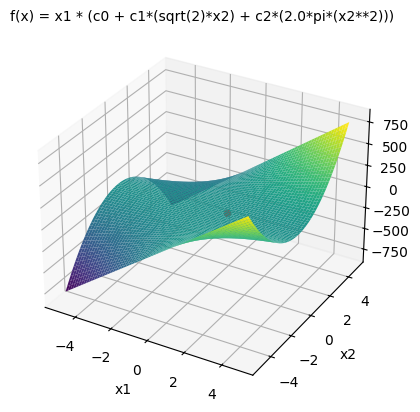

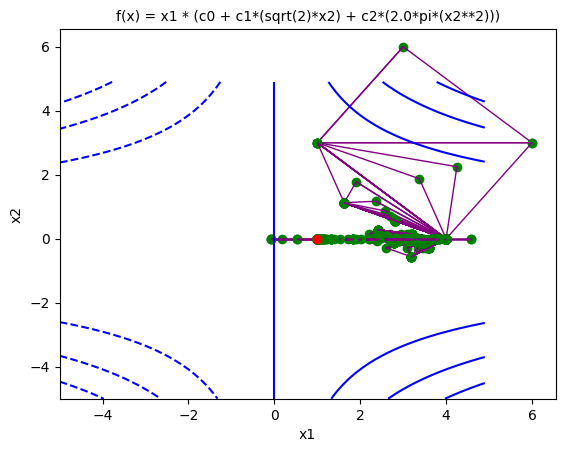

In [108]:
def nelderMeadSimplex (function, constants, x, y, z, dim):
  e = 1e-6
  time = 0
  timeout = 1000
  triangles = []
  points = np.array([x, y, z])
  c, ic, p, oc, r, ex = -1.0, -0.5, 0.0, 0.5, 1.0, 2.0

  while time < timeout:
    triangles.append(np.copy(points))
    vertices = [f(function, constants, points[0]), f(function, constants, points[1]), f(function, constants, points[2])]
    
    bestIndex = vertices.index(min(vertices))
    worstIndex = vertices.index(max(vertices))
    neutralIndex = [i for i in range(len(vertices)) if i != bestIndex and i != worstIndex][0]

    print(f'\nIteração {time}==========================')
    print(f'Pontos: {points}')
    print(f'f(x) dos vertices: {vertices}')
    print(f'Melhor vertice: vertices[{bestIndex}] = {vertices[bestIndex]}')
    print(f'Vertice Neutro: vertices[{neutralIndex}] = {vertices[neutralIndex]}')
    print(f'Pior vertice: vertices[{worstIndex}] = {vertices[worstIndex]}')

    centroid = np.array([0.0,0.0])
    for i, point in enumerate(points):
      if i != worstIndex:
        print (f'Centroid: {centroid}')
        centroid += point

    centroid = centroid/dim
    print (f'Centroid: {centroid}')
    if vertices[worstIndex] - vertices[bestIndex] < e:
      break

    xr = ((1.0 + r) * centroid) - (r * points[worstIndex])
    fr = f(function, constants, xr)

    # Reflection
    if vertices[bestIndex] <= fr and fr < vertices[neutralIndex]:
      print(f'Reflexão: {xr}')
      points[worstIndex] = xr
    # Expansion
    elif fr < vertices[bestIndex]:
      print(f'Expansão')
      xex = ((1.0 + ex) * centroid) - (ex * points[worstIndex])
      fex = f(function, constants, xex)

      if fex < fr:
        points[worstIndex] = xex
      else:
        points[worstIndex] = xr
    # External Contraction
    elif vertices[neutralIndex] <= fr and fr < vertices[worstIndex]:
      print(f'Contração Externa')
      xoc = ((1.0 + oc) * centroid) - (oc * points[worstIndex])
      foc = f(function, constants, xoc)

      if foc < fr:
        points[worstIndex] = xoc
      else:
        points[neutralIndex] = (points[bestIndex] - (points[neutralIndex] - points[bestIndex])) / 2.0
        points[worstIndex] = (points[bestIndex] - (points[worstIndex] - points[bestIndex])) / 2.0
    # Internal Contraction
    elif fr >= vertices[worstIndex]:
      print(f'Contração Interna')
      xic = ((1.0 + ic) * centroid) - (ic * points[worstIndex])
      print(xic)
      fic = f(function, constants, xic)
      print(fic)

      if fic < fr:
        points[worstIndex] = xic
      else:
        points[neutralIndex] = (points[bestIndex] - (points[neutralIndex] - points[bestIndex])) / 2.0
        points[worstIndex] = (points[bestIndex] - (points[worstIndex] - points[bestIndex])) / 2.0

    time += 1

  return [time, triangles, points[bestIndex]]


function = "x1 * (c0 + c1*(sqrt(2)*x2) + c2*(2.0*pi*(x2**2)))" #x1 equivale a n e x2 equivale a r
constants = [1.0, 1.0, 1.0]
[time, triangles, minimun]= nelderMeadSimplex(function,constants, [1.0, 3.0], [3.0, 6.0], [6.0, 3.0], 2.0)

print(minimun)

plot3D(function, constants, minimun, 5.0)
plotContour(function, constants, minimun, triangles, 5.0)
